In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('white')

In [2]:
df = sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


The basic mapping of dplyr to pandas is:

| `dplyr`     | `pandas`         |
|:-----------:|:----------------:|
|`mutate`     | `assign`         |
|`select`     | `filter`         |
|`rename`     | `rename`         |
|`filter`     | `query`          |
|`arrange`    | `sort_values`    |
|`group_by`   | `groupby`        |
|`summarize`  | `agg`            |

```r
df %>%
  select(carat, color) %>%
  filter(color == 'E') %>%
  head(3)
```

In [3]:
(df
 .filter(['carat', 'color'])
 .query('color == "E"')
 .head(3))

,carat,color
0,0.23,E
1,0.21,E
2,0.23,E


`dplyr`

```r
df %>%  
  select(starts_with('c')) %>%  
  filter(cut %in% c('Ideal', 'Premium')) %>%  
  group_by(cut, color, clarity) %>%  
  summarise(avgcarat = mean(carat, na.rm = TRUE), n = n()) %>%  
  arrange(desc(avgcarat)) %>%  
  head()
```

In [6]:
(df
 .filter(regex='^c')
 .query('cut in ["Ideal", "Premium"]')
 .groupby(['cut', 'color', 'clarity'])
 .agg(['mean', 'size'])
 .sort_values(by=('carat', 'mean'), ascending=False)
 .head())

carat     
                           mean size
cut     color clarity               
Ideal   J     I1       1.990000    2
Premium I     I1       1.605833   24
        J     I1       1.578462   13
              SI2      1.554534  161
Ideal   H     I1       1.475526   38

`tidyr`  

```r
df %>%
  select(x, y, z) %>%
  gather(key = dim, value = mm) %>%
  head()
```

In [7]:
(df
 .assign(pricecat = pd.cut(df['price'], bins=3, labels=['low', 'med', 'high']))
 .filter(['x', 'z', 'pricecat'])
 .rename(columns={'x': 'width', 'z': 'depth'})
 .melt(id_vars=['pricecat'], value_vars=['width', 'depth'],
       var_name='dim', value_name='mm')
 .head())

,pricecat,dim,mm
0,low,width,3.95
1,low,width,3.89
2,low,width,4.05
3,low,width,4.20
4,low,width,4.34


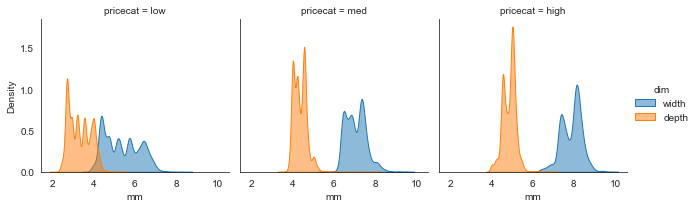

In [8]:
df2 = (df
 .assign(pricecat = pd.cut(df['price'], bins=3, labels=['low', 'med', 'high']))
 .filter(['x', 'z', 'pricecat'])
 .rename(columns={'x': 'width', 'z': 'depth'})
 .melt(id_vars=['pricecat'], value_vars=['width', 'depth'],
       var_name='dim', value_name='mm')
 .query('2 < mm < 10'))

g = sns.FacetGrid(data=df2, col='pricecat', hue='dim')
g.map(sns.kdeplot, 'mm', shade=True, alpha=0.5).add_legend()

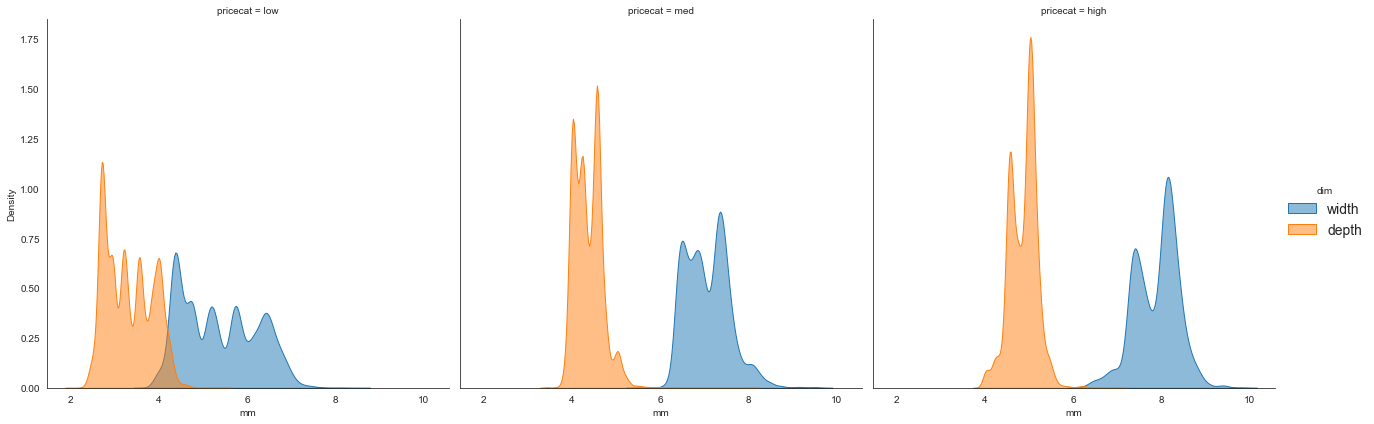

In [9]:
(df
 .assign(pricecat = pd.cut(df['price'], bins=3, labels=['low', 'med', 'high']))
 .filter(['x', 'z', 'pricecat'])
 .rename(columns={'x': 'width', 'z': 'depth'})
 .melt(id_vars=['pricecat'], value_vars=['width', 'depth'],
       var_name='dim', value_name='mm')
 .query('2 < mm < 10')
 .pipe((sns.FacetGrid, 'data'),
       col='pricecat', hue='dim', height=6)
 .map(sns.kdeplot, 'mm', shade=True, alpha=0.5)
 .add_legend(fontsize=14))

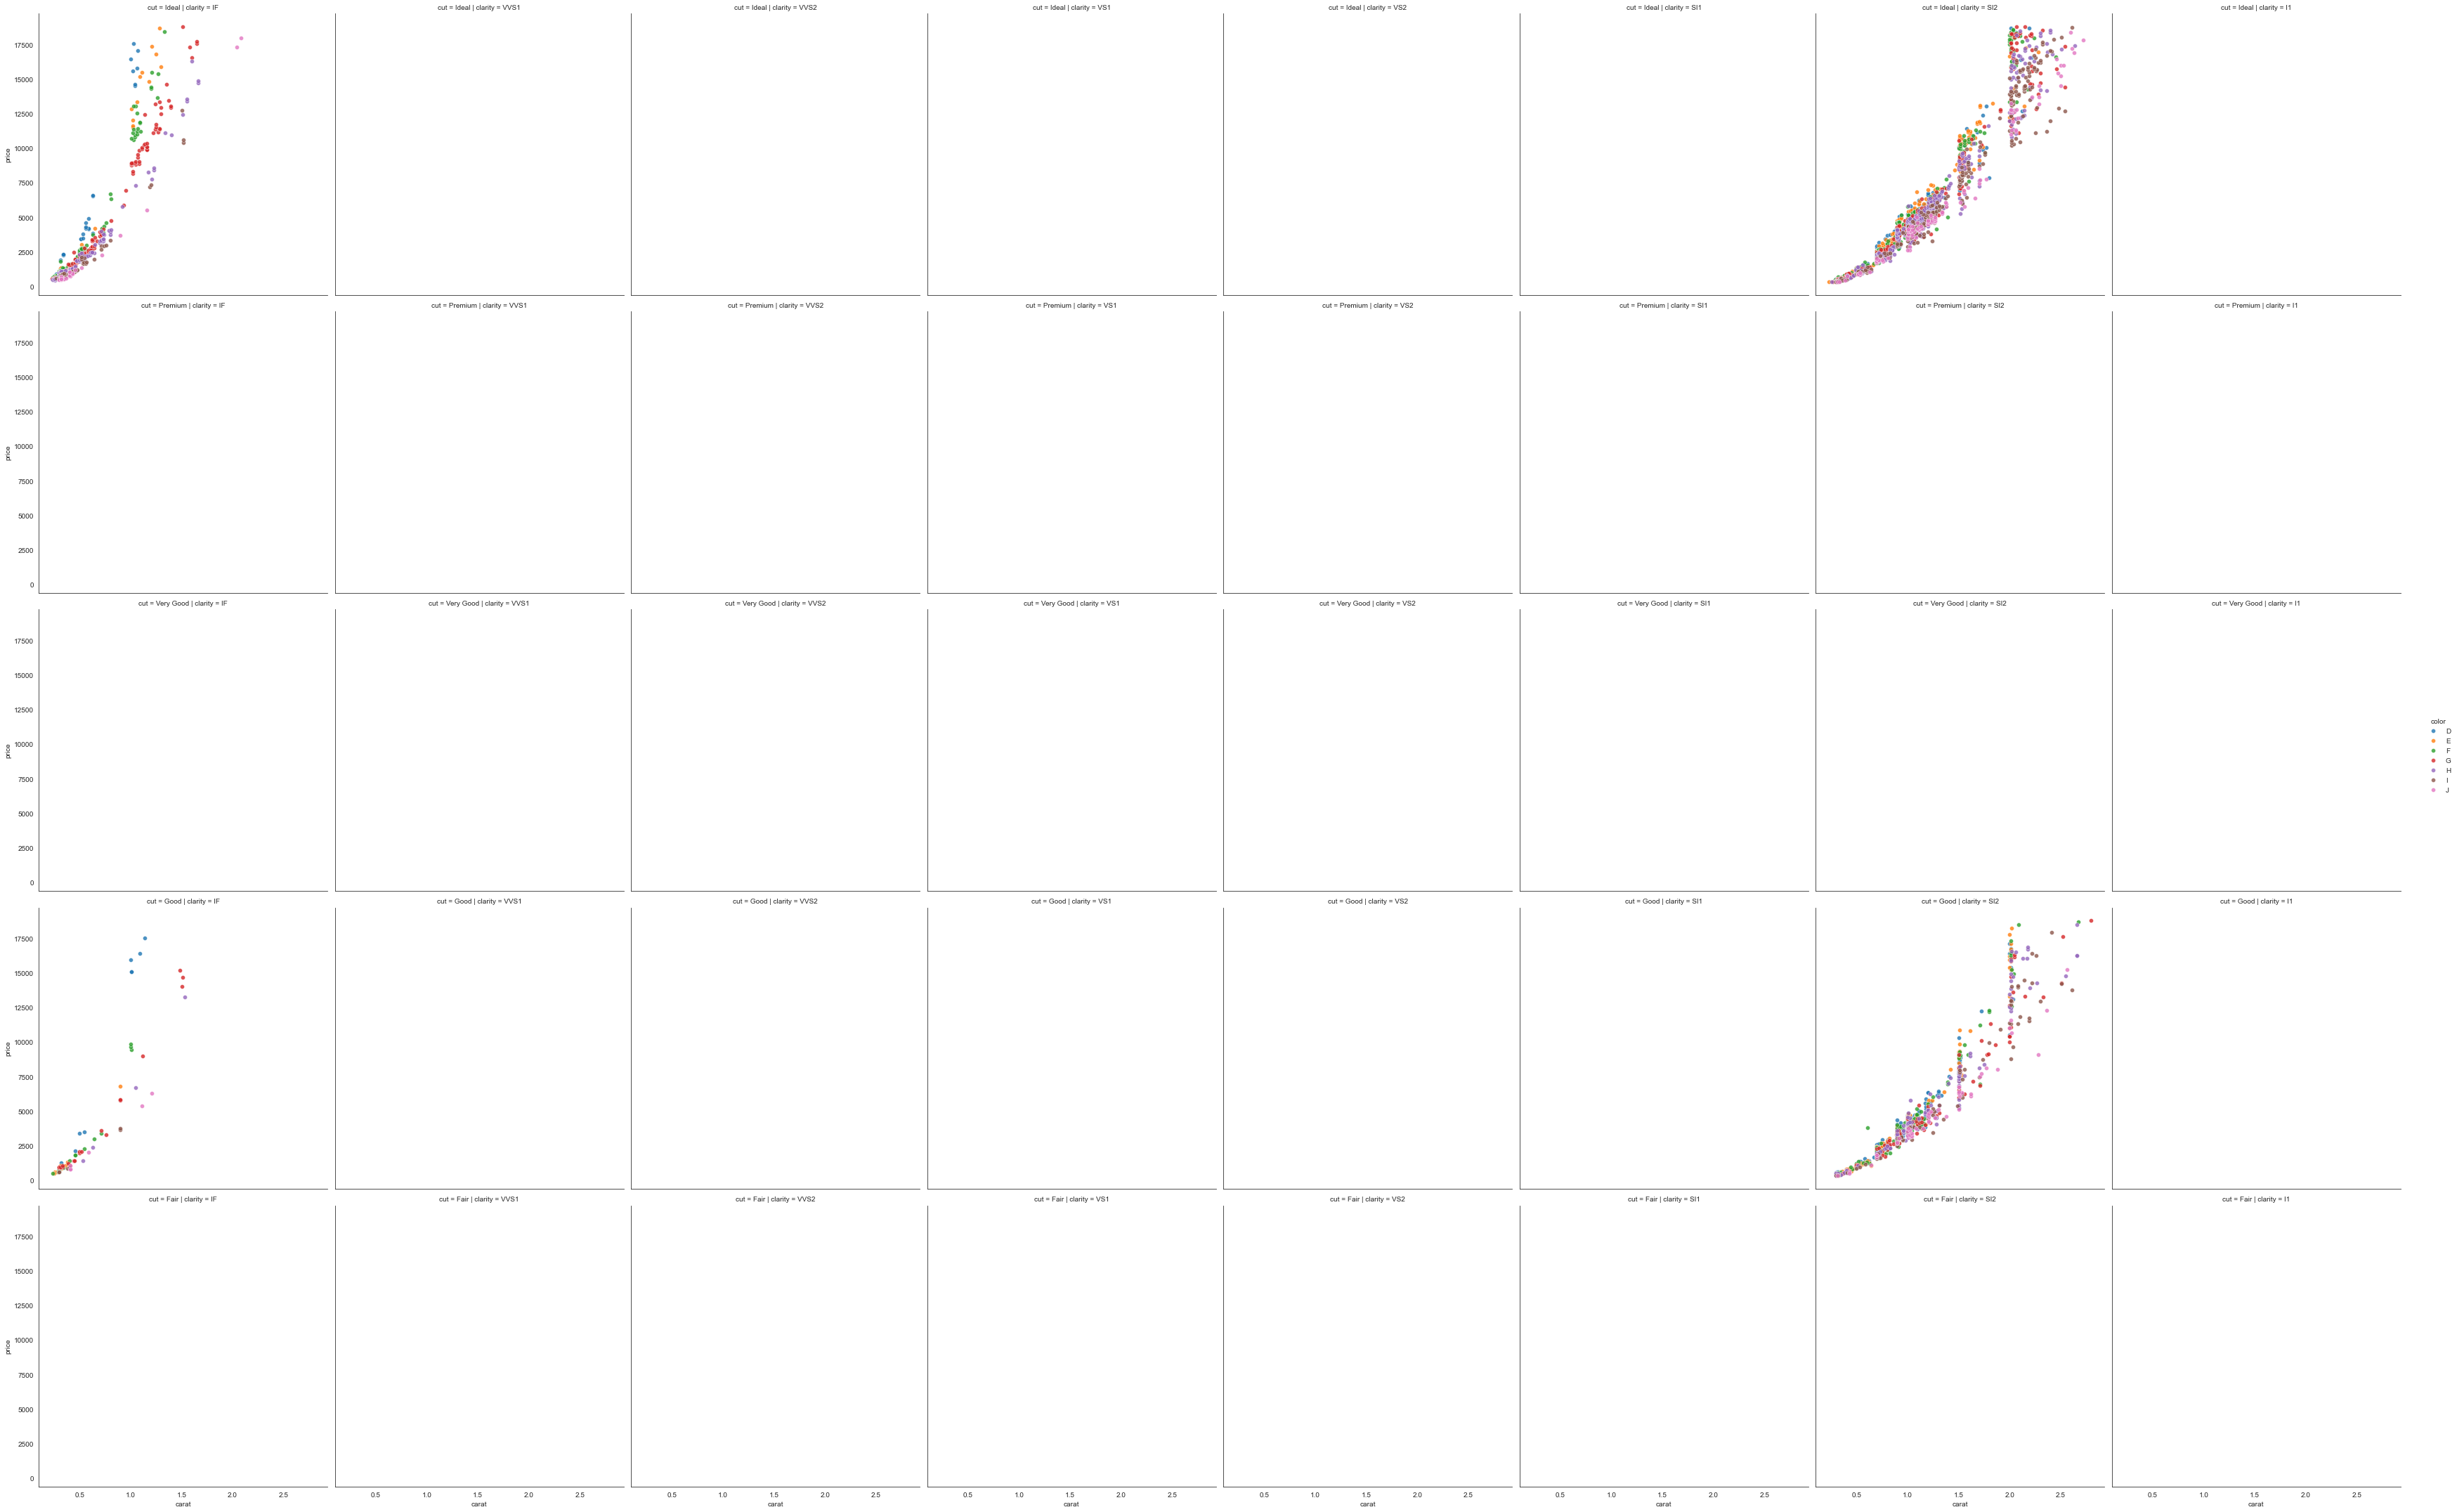

In [11]:
(df
 .query('cut in ["Ideal", "Good"] & \
         clarity in ["IF", "SI2"] & \
         carat < 3')
 .pipe((sns.FacetGrid, 'data'),
       row='cut', col='clarity', hue='color',
       hue_order=list('DEFGHIJ'),
       height=6,
       legend_out=True)
 .map(sns.scatterplot, 'carat', 'price', alpha=0.8)
 .add_legend())

<AxesSubplot:xlabel='carat', ylabel='price'>

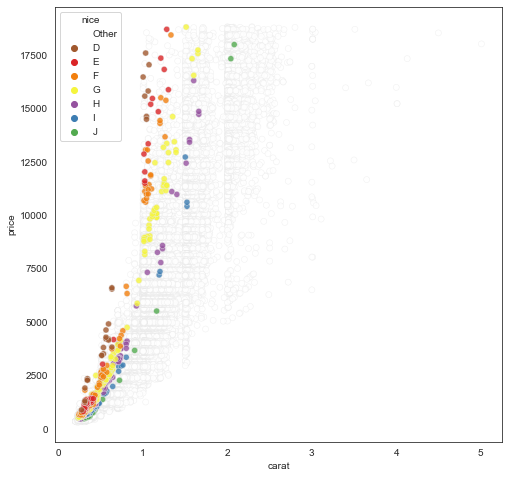

In [12]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
pal = dict(zip(df['color'].unique(), sns.color_palette('Set1', desat=.9)))
pal['Other'] = (1,1,1)

(df
 .assign(nice = np.where((df['cut']=='Ideal') & (df['clarity']=='IF'), df['color'], 'Other'))
 .sort_values(by='nice', ascending=False)
 .pipe((sns.scatterplot, 'data'),
       x='carat', y='price',
       hue='nice', hue_order=np.append('Other', list('DEFGHIJ')),
       palette=pal,
       alpha=0.8,
       edgecolor=(0.92,0.92,0.92),
       ax=ax))

<AxesSubplot:xlabel='carat', ylabel='price'>

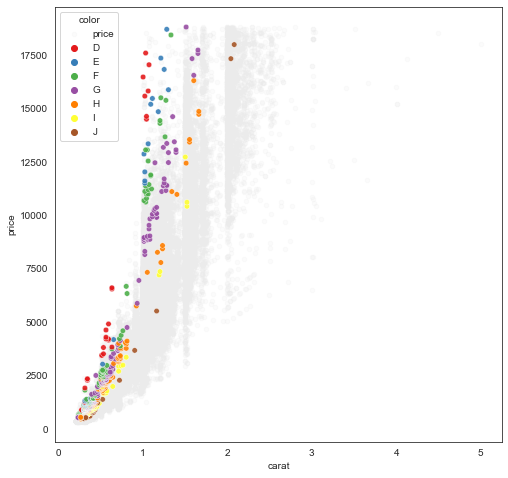

In [13]:
df2 = (df
 .assign(nice = np.where((df['cut']=='Ideal') & (df['clarity']=='IF'), df['color'], 'Other')))

fig, ax = plt.subplots(1,1, figsize=(8,8))

ax.scatter(data=df2.query('nice == "Other"'), x='carat', y='price',
           c=[[0.92,0.92,0.92]], s=20, alpha=0.2)

sns.scatterplot(data=df2.query('nice != "Other"'), x='carat', y='price', 
                hue='color', hue_order=list('DEFGHIJ'),
                palette='Set1', s=30, alpha=0.9, ax=ax)

<details><summary>CLICK ME</summary>
<p>

#### We can hide anything, even code!

    ```r
       print("Hello World")
    ```

</p>
</details>

> Text that is a quote

Use `git status` to list all new or modified files that haven't yet been committed.

Some basic Git commands are:
```
git status
git add
git commit
```

This site was built using [GitHub Pages](https://pages.github.com/).

- [x] #739
- [ ] https://github.com/octo-org/octo-repo/issues/740
- [ ] Add delight to the experience when all tasks are complete :tada:

Here is a simple footnote[^1].  

A footnote can also have multiple lines[^2].  

You can also use words, to fit your writing style more closely[^note].  

[^1]: My reference.  
[^2]: Every new line should be prefixed with 2 spaces.  
  This allows you to have a footnote with multiple lines.  
[^note]:
    Named footnotes will still render with numbers instead of the text but allow easier identification and linking.  
    This footnote also has been made with a different syntax using 4 spaces for new lines.

| Command | Description |
| --- | --- |
| git status | List all new or modified files |
| git diff | Show file differences that haven't been staged |

<table>
  <tr>
    <td>
           hi
    </td>
  </tr>
</table>

okay.

<style
  type="text/css">
h1 {color:red;}

p {color:blue;}
</style>
okay

# [Tab1](#tab/id1/condition1)
Foo
# [Tab1](#tab/id2)
Bar
---

In [4]:
!pip install pymdown-extensions

     |████████████████████████████████| 215 kB 4.9 MB/s eta 0:00:01


In [7]:
import markdown
md = markdown.Markdown(extensions=['pymdownx.arithmatex'])

$p(x|y) = \frac{p(y|x)p(x)}{p(y)}, p(x \mid y) = \frac{p(y|x)p(x)}{p(y)}$

$$
E(\mathbf{v}, \mathbf{h}) = -\sum_{i,j}w_{ij}v_i h_j - \sum_i b_i v_i - \sum_j c_j h_j
$$

\[3 < 4\]

\begin{align}
    p(v_i=1|\mathbf{h}) & = \sigma\left(\sum_j w_{ij}h_j + b_i\right) \\
    p(h_j=1|\mathbf{v}) & = \sigma\left(\sum_i w_{ij}v_i + c_j\right)
\end{align}

=== "Tab 1"
    Markdown **content**.

    Multiple paragraphs.

=== "Tab 2"
    More Markdown **content**.

    - list item a
    - list item b

## Results {.tabset}

### Python

```python
(df
 .filter(['carat', 'color'])
 .query('color == "E"')
 .head(3))
```

### R

```r
df %>%
  select(carat, color) %>%
  filter(color == 'E') %>%
  head(3)
```